In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio

In [ ]:
!unzip "/content/data.zip"

In [ ]:
def build_DataFrame(path):
    with open(path) as f:
        lines = f.readlines()
    mice_dict = {}
    table = []
    times = []
    for l in lines[3:]:
        values = l.strip().split(',')
        time = eval(values.pop(0))
        times.append(time)
        values = [eval(v) if v!='' else -1 for v in values]
        table.append(values)
    table = np.array(table)
    for i, (mouse, body) in enumerate(zip(lines[0].strip().split(',')[1:],
                                          lines[1].strip().split(',')[1:])):
        if i%3==0:
          val = 'likelyhood'  
        elif i%3==1:
          val = 'x' 
        else:
          val = 'y'
            
        mice_dict[mouse, body, val] = table[:, i]
    return pd.DataFrame(mice_dict)

In [ ]:
import itertools
parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]
paired = list(itertools.product(days, trials))
print(paired)

[('Day1', 'Trial1'), ('Day1', 'Trial2'), ('Day1', 'Trial3'), ('Day1', 'Trial4'), ('Day1', 'Trial5'), ('Day1', 'Trial6'), ('Day1', 'Trial7'), ('Day1', 'Trial8'), ('Day1', 'Trial9'), ('Day1', 'Trial10'), ('Day2', 'Trial1'), ('Day2', 'Trial2'), ('Day2', 'Trial3'), ('Day2', 'Trial4'), ('Day2', 'Trial5'), ('Day2', 'Trial6'), ('Day2', 'Trial7'), ('Day2', 'Trial8'), ('Day2', 'Trial9'), ('Day2', 'Trial10'), ('Day3', 'Trial1'), ('Day3', 'Trial2'), ('Day3', 'Trial3'), ('Day3', 'Trial4'), ('Day3', 'Trial5'), ('Day3', 'Trial6'), ('Day3', 'Trial7'), ('Day3', 'Trial8'), ('Day3', 'Trial9'), ('Day3', 'Trial10'), ('Day4', 'Trial1'), ('Day4', 'Trial2'), ('Day4', 'Trial3'), ('Day4', 'Trial4'), ('Day4', 'Trial5'), ('Day4', 'Trial6'), ('Day4', 'Trial7'), ('Day4', 'Trial8'), ('Day4', 'Trial9'), ('Day4', 'Trial10'), ('Day5', 'Trial1'), ('Day5', 'Trial2'), ('Day5', 'Trial3'), ('Day5', 'Trial4'), ('Day5', 'Trial5'), ('Day5', 'Trial6'), ('Day5', 'Trial7'), ('Day5', 'Trial8'), ('Day5', 'Trial9'), ('Day5', 'Trial

In [ ]:
import os
from pathlib import Path

mouse1 = []
mouse2 = []
mouse3 = []
mouse4 = []

rootdir = os.getcwd()
path = "/content/data/"

for i in range(1, 6): # 5
  for j in range(1, 11): # 10
    #path = Path("/content/data/" + "G#Day" + str(i) + "Trial" + str(j) + ".csv")
    path = Path("/content/data/" + "G2Day" + str(i) + "Trial" + str(j) + ".csv")
    if(path.is_file()):
      #tmp_df = build_DataFrame("/content/data/" + "G1Day" + str(i) + "Trial" + str(j) + ".csv")
      tmp_df = build_DataFrame("/content/data/" + "G2Day" + str(i) + "Trial" + str(j) + ".csv")
    else:
      print(path.name + " is missing !")
      tmp_df = tmp_df.iloc[0:0]

    mouse1.append(tmp_df['mus1'])
    mouse2.append(tmp_df['mus2'])
    mouse3.append(tmp_df['mus3'])
    mouse4.append(tmp_df['mus4'])

G2Day2Trial4.csv is missing !


In [ ]:
mus1_df = pd.concat(mouse1, keys = paired, axis=1)
mus2_df = pd.concat(mouse2, keys = paired, axis=1)
mus3_df = pd.concat(mouse3, keys = paired, axis=1)
mus4_df = pd.concat(mouse4, keys = paired, axis=1)

In [ ]:
def replace_missing_data(dataframe):
    dataframe.replace({-1.0: np.nan}, regex=True, inplace=True)
    dataframe.replace({-1: np.nan}, regex=True, inplace=True)
    dataframe.replace({0: np.nan}, regex=True, inplace=True)

In [ ]:
for dataframe in [mus1_df, mus2_df, mus3_df, mus4_df]:
  replace_missing_data(dataframe)

In [ ]:
replace_missing_data(mus1_df)
mus1_df

In [ ]:
mus1_df.describe

In [ ]:
for day in days:
      for trial in trials:
        for bp in parts:
          x = dataframe[day][trial][bp]['x']
          outlier_x = np.abs((x - np.nanmean(x)) / np.nanstd(x)) > 2
          dataframe.loc[:, (day, trial, bp, 'x')] = x.where(~outlier_x, np.nan)

          y = dataframe[day][trial][bp]['y']
          outlier_y = np.abs((y - np.nanmean(y)) / np.nanstd(y)) > 2
          dataframe.loc[:, (day, trial, bp, 'y')] = y.where(~outlier_y, np.nan)

# 1] Data exploration / visualization : 

### Plot all the bodyparts (8) of 1 mouse during 1 trial : 

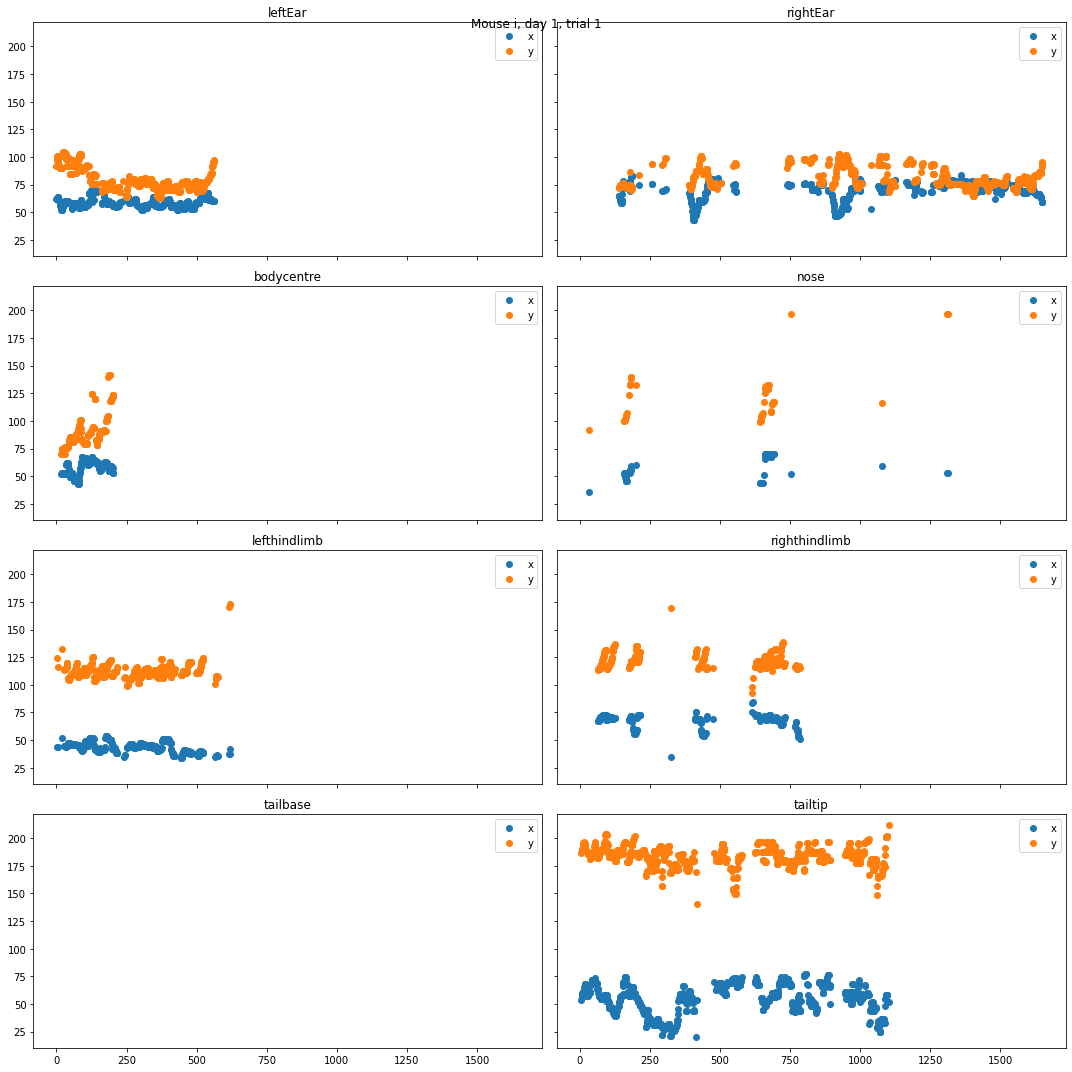

In [ ]:
def plot_all_parts(mouse_df, day_id, trial_id, threshold):
  fig, ax = plt.subplots(4, 2, figsize=(15,15), sharex=True, sharey=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  fig.suptitle("Mouse " + "i, " + "day " + str(day_id) + ", trial " + str(trial_id))
  for i in range(8):
    bp = parts[i]
    x = mouse_df[days[day_id]][trials[i]][bp]['x']
    y = mouse_df[days[day_id]][trials[i]][bp]['y']
    l = mouse_df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = threshold<l
    j = 0

    if i > 3:
      j = 1
    ax[i%4, j].plot(np.arange(x.shape[0])[mask], x[mask], 'o', label='x')
    ax[i%4, j].plot(np.arange(x.shape[0])[mask], y[mask], 'o', label='y')
    ax[i%4, j].set_title(bp)
    ax[i%4, j].invert_yaxis()
    ax[i%4, j].legend()
    fig.tight_layout()

plot_all_parts(mus1_df, 1, 1, .2)

## Plots 

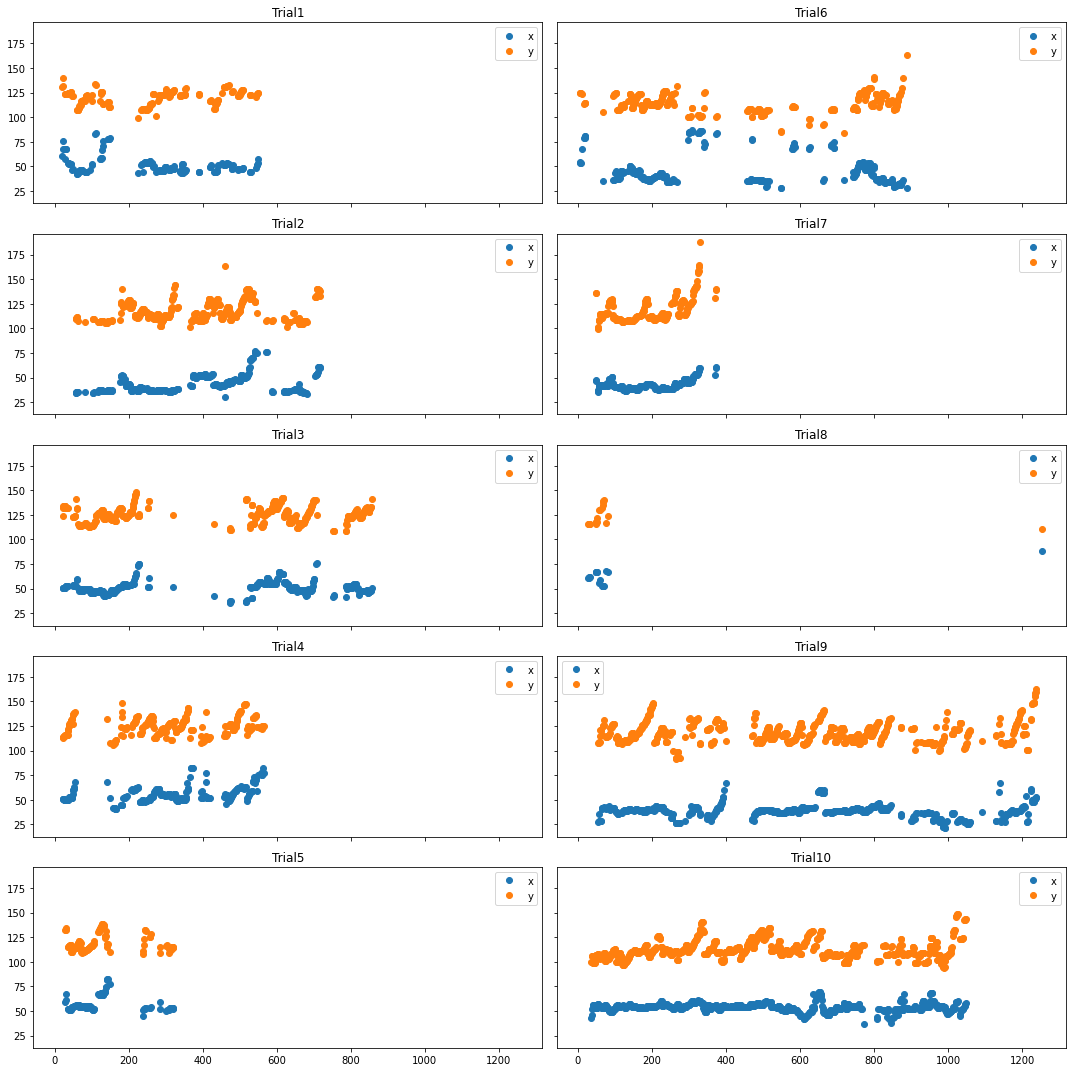

In [ ]:
def plot_all_trials(df, day_id, bp, threshold):
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)

  day_id = day_id - 1
  for i in range(10):
    x = df[days[day_id]][trials[i]][bp]['x']
    y = df[days[day_id]][trials[i]][bp]['y']
    # .rolling(90).mean()
    l = df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = threshold<l

    #print("Trial " + str(i) + " : " + str(x[mask].shape[0] / x.shape[0] * 100) + "%")
    j = day_id * 10 + i

    ax[i%5, i // 5].plot(np.arange(x.shape[0])[mask], x[mask], 'o', label='x')
    ax[i%5, i // 5].plot(np.arange(y.shape[0])[mask], y[mask], 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    ax[i%5, i // 5].invert_yaxis()
    fig.tight_layout()

plot_all_trials(mus1_df, 1, "lefthindlimb", .2)

### Plot the maxLikelihood hind limb :

In [ ]:
#
def plot_max_same_day(df, day_id, times):
  # sharex=True
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1
  for i in range(10):

    l1 = df[days[day_id]][trials[i]]['lefthindlimb']['likelyhood']
    l2 = df[days[day_id]][trials[i]]['righthindlimb']['likelyhood']

    mask1 = .5<l1
    mask2 = .5<l2

    if(mask1.values.sum() > mask2.values.sum()):
      bp = 'lefthindlimb'
    else:
      bp = 'righthindlimb'

    x = df[days[day_id]][trials[i]][bp]['x'].rolling(60).mean()
    y = df[days[day_id]][trials[i]][bp]['y'].rolling(60).mean()
    l = df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = .5<l
    j = day_id * 10 + i

    ax[i%5, i // 5].plot(np.arange(x.shape[0])[mask], x[mask], 'o', label='x')
    ax[i%5, i // 5].plot(np.arange(y.shape[0])[mask], y[mask], 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_max_same_day(mus4_df, 3, trials_times)

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
def plot_distances(df, day_id, times, bp1, bp2):
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1

  for i in range(10):

    tmp1 = np.square(df[days[day_id]][trials[i]][bp1]['x'] - df[days[day_id]][trials[i]][bp2]['x']) 
    tmp2 = np.square(df[days[day_id]][trials[i]][bp1]['y'] - df[days[day_id]][trials[i]][bp2]['y']) 

    x = np.sqrt(tmp1 - tmp2)

    j = day_id * 10 + i

    ax[i%5, i // 5].plot(np.arange(x.shape[0]), x, 'o', label='x')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_distances(mus2_df, 2, trials_times, "bodycentre", 'lefthindlimb')

In [ ]:
from re import X
def plot_trajectory(df, day_id, day):
  # sharex=True
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1

  for i in range(10):

    l = df[days[day_id]][trials[i]]['lefthindlimb']['likelyhood']

    mask1 = .5<l1 
    mask2 = .5<l2

    mask = mask1 & mask2

    x = np.abs(df[days[day_id]][trials[i]][bp1]['x'] - df[days[day_id]][trials[i]][bp2]['x'])
    y = np.abs(df[days[day_id]][trials[i]][bp1]['y'] - df[days[day_id]][trials[i]][bp2]['y'])

    j = day_id * 10 + i

    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], x[mask].rolling(90).mean(), 'o', label='x')
    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], y[mask].rolling(90).mean(), 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()

plot_trajectory(mus1_df, 1, 1)

# Plot the trajectory of a mouse 

In [ ]:
def plot_trajectory(df, day_id, trial_id, threshold):

  fig, ax = plt.subplots(4, 2, figsize=(15,15), sharex=True, sharey=True)

  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  for i in range(8):
    bp = parts[i]
    x = df[days[day_id]][trials[trial_id]][bp]['x']
    y = df[days[day_id]][trials[trial_id]][bp]['y']
    l = df[days[day_id]][trials[trial_id]][bp]['likelyhood']
    mask = threshold<l
    j = 0
    if i > 3: j = 1

    sc = ax[i%4, j].scatter(x[mask], y[mask], c=np.arange(x[mask].shape[0]), cmap='Blues', alpha=.6, facecolor=None)
    ax[i%4, j].plot(x[mask], y[mask], 'k-', zorder=0, alpha=.8)
    ax[i%4, j].set_title(bp)
    ax[i%4, j].set_aspect('equal')
    ax[i%4, j].set_title(bp)

  #fig.colorbar(sc, ax=ax, shrink=.5, label='Likelyhood', ticks=[min(l[mask]), 1], format='%.1f', drawedges=False)
  fig.tight_layout()
plot_trajectory(mus1_df.iloc[1:20, :], 1, 1, .1)

# 2] Ways to visualize patterns  :

In [ ]:
mus4_df["Day4"]["Trial6"].shape

(4570, 24)

In [ ]:
def plot_pattern(mouse_df, day_id, trial_id, start_ts, end_ts, threshold):
  start_frame = start_ts * 30
  end_frame = end_ts * 30
  print(str(start_frame) + " - ", str(end_frame))

  #plot_all_parts(mouse_df.iloc[start_frame:end_frame, :], day_id, trial_id, threshold)
  plot_trajectory(mouse_df.iloc[start_frame:end_frame, :], day_id, trial_id, threshold)

1620 -  1650


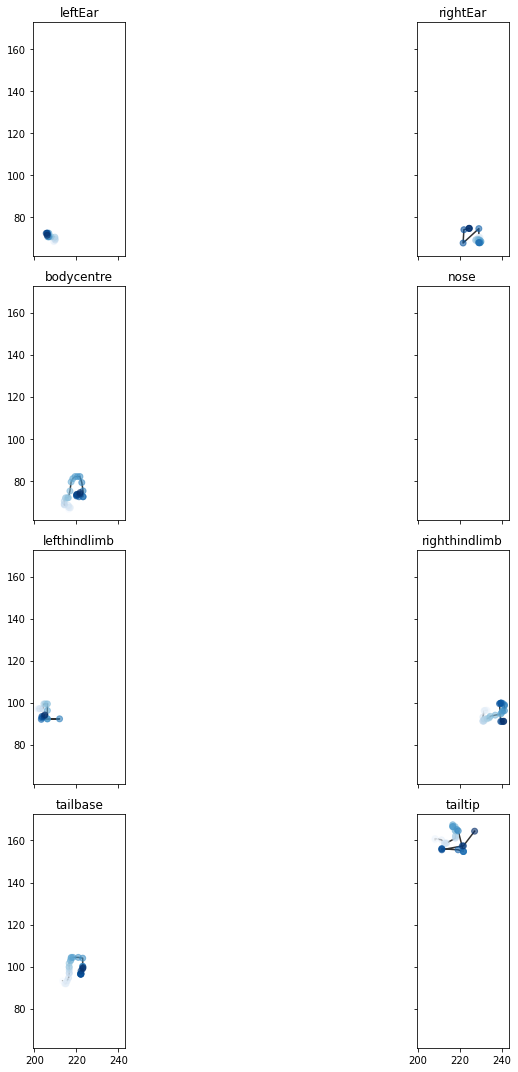

In [ ]:
plot_pattern(mus4_df, 4, 6, 54, 55, .1)